In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwords_scratch

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('komentardengansentimen.csv', index_col = 0)
df.head()

,Komentar,jumlahlike,tanggal,waktu,komentator,Sentimen
0,2025,0.0,2024-10-17,13:10:53,korompot14channel69,neutral
1,arsip nasional,0.0,2024-10-16,09:25:46,bumibulat,neutral
2,wkwk kangen vibesnya sih kalo virusnya mah ami...,0.0,2024-10-14,16:01:31,muhamadrahmatramadhani7947,negative
3,dulu kata2 viral netizen indonesia quot ah ind...,0.0,2024-10-10,03:58:12,bagusekosw1573,negative
4,bapakku korban virus itu,0.0,2024-10-05,14:40:30,meilanyfinaramaidha366,negative


In [3]:
# panggil stopword id
list_stopwords = stopwords_scratch.words('indonesian')
# panggil stopword en
list_stopwords_en = stopwords_scratch.words('english')
# gabungkan id & en
list_stopwords.extend(list_stopwords_en)
# tambah daftar stopword jika perlu
list_stopwords.extend(['ya', 'yg', 'ga', 'yuk', 'dah', 'ngga', 'engga', 'ygy', 'wkwkwkwkkw', 'dok', 'sih', 'tdk', 'aja', 'dan', 'yang'])
stopwords = list_stopwords

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3994 entries, 0 to 3995
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Komentar    3948 non-null   object 
 1   jumlahlike  3993 non-null   float64
 2   tanggal     3994 non-null   object 
 3   waktu       3994 non-null   object 
 4   komentator  3994 non-null   object 
 5   Sentimen    3994 non-null   object 
dtypes: float64(1), object(5)
memory usage: 218.4+ KB


In [5]:
df['Komentar'] = df['Komentar'].fillna('') 
df = df['Komentar'].to_list()

In [6]:
df[:10]

['2025',
 'arsip nasional',
 'wkwk kangen vibesnya sih kalo virusnya mah amit amit jangan dateng lagi deh',
 'dulu kata2 viral netizen indonesia quot ah indonesia mah gak mempan orang makanan jatoh aja dibilang blom 5 menit quot setelah menyebar',
 'bapakku korban virus itu',
 'kangen pls',
 'klo gw sih gak kangen ya masa mau lagi ada virus korona wkkw',
 'lamanya diagnosa pada warga depok lebih kurang 3 minggu lama sekaliiiii',
 'gw nonton di tahun 2024',
 'p']

In [7]:
vectorizer = TfidfVectorizer(stop_words=stopwords)
x = vectorizer.fit_transform(df[:100])

d:\eksperimen\appweb\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [8]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(x)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [9]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# get_feature_names is deprecated in scikit-learn versions >= 0.2
# and replaced by get_feature_names_out
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
  print("Cluster %d:" % i),
  for ind in order_centroids[i, :10]:
    print(' %s' % terms[ind])
  print()

Cluster 0:
 2020
 kangen
 hai
 pas
 corona
 2022
 selamat
 hallo
 libur
 meninggalkan

Cluster 1:
 2024
 gw
 nonton
 nich
 hadir
 hallo
 dadi
 ngapain
 kesini
 bentar

Cluster 2:
 kangen
 nostalgia
 udah
 libur
 tree
 lemon
 minggu
 gw
 covid
 halo



In [10]:
from sklearn.metrics import silhouette_score

silhouette_score(x, labels=model.predict(x))

np.float64(0.08708260294797178)

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(x.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

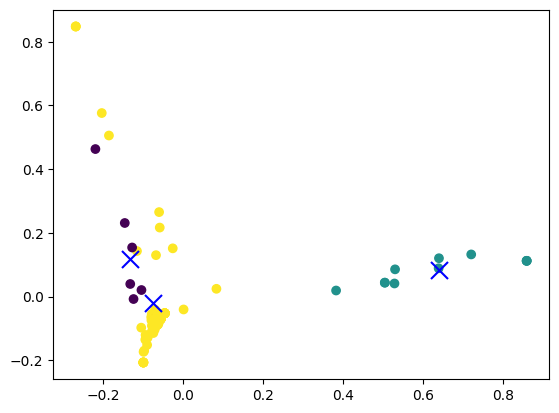

In [12]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(x))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

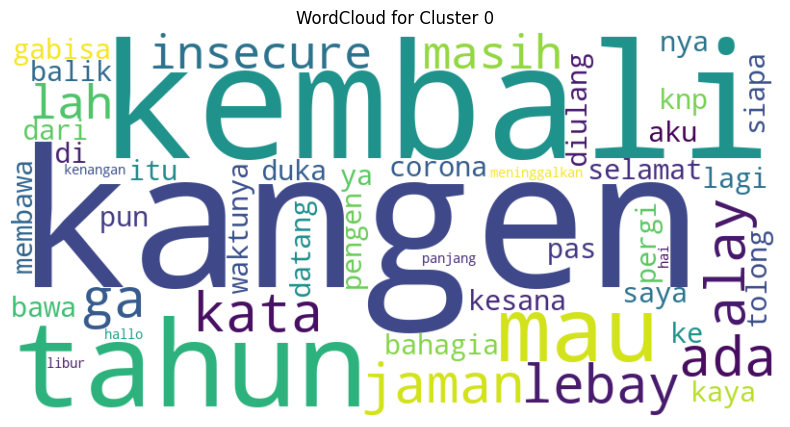

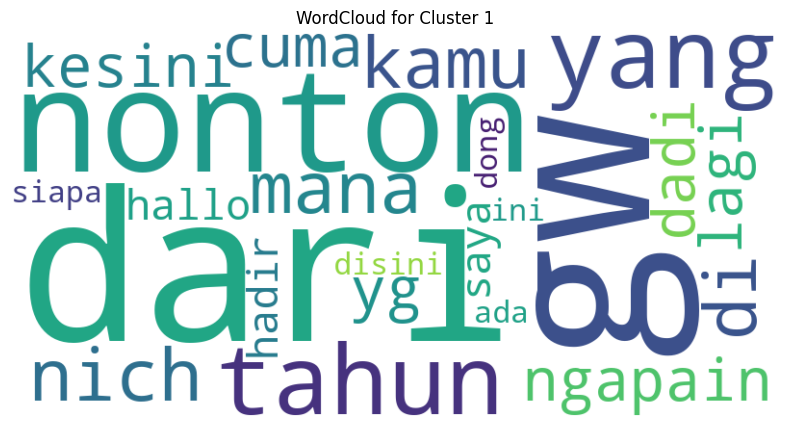

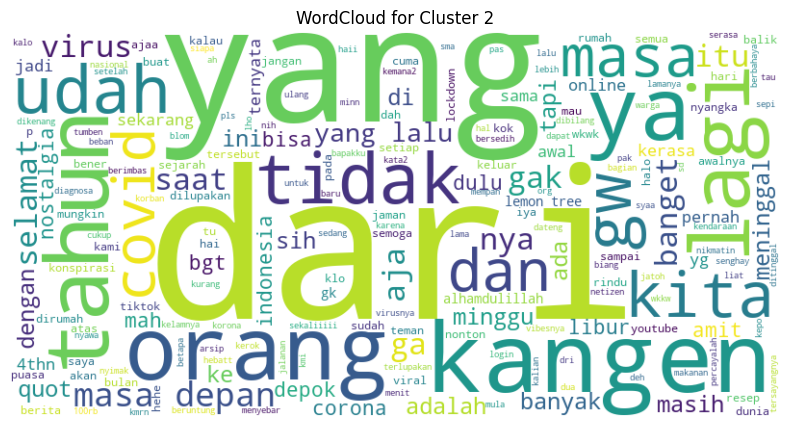

In [13]:
from wordcloud import WordCloud

labels = np.array(model.predict(x))

for i in range(true_k):
    # Ambil komentar yang termasuk dalam kluster ke-i
    cluster_comments = [df[j] for j in range(len(labels)) if labels[j] == i]
    
    # Gabungkan komentar menjadi satu teks
    cluster_text = ' '.join(cluster_comments)

    # Buat WordCloud untuk kluster i
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

    # Tampilkan WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for Cluster {i}')
    plt.show()
    